In [1]:
# Import libraries
import numpy as np
import pandas as pd
import random
import seaborn
import matplotlib.pyplot as plt
import scipy
from scipy.fft import fft, ifft, fftfreq
seaborn.set_palette(seaborn.color_palette())
import warnings; warnings.simplefilter('ignore')

In [2]:
pwd

'/Users/starfarmer2/Desktop/Jasper/Coding Files/DIIG/Aquatrax/Aquatrax_F23/Code/src/Small_Leaks'

In [3]:
# Read dataset
FILE_NAME = '../../data/Positive_Meters_Data/Aquatrax_SmallLeak.csv'
df = pd.read_csv(FILE_NAME)
df

,AccountNumber,Usagedate,Value,MeterNumber,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0250780-511949,08-01-2022 00:00,6,0250780-10450-1,NaN,NaN,AccountNumber
1,0250780-511949,08-01-2022 01:00,2,0250780-10450-1,NaN,NaN,0250780-511949
2,0250780-511949,08-01-2022 02:00,2,0250780-10450-1,NaN,NaN,0751760-445274
3,0250780-511949,08-01-2022 03:00,2,0250780-10450-1,NaN,NaN,0800240-294760
4,0250780-511949,08-01-2022 04:00,1,0250780-10450-1,NaN,NaN,1000320-20089
...,...,...,...,...,...,...,...
125858,5751740-68085,09-04-2023 19:00,8,5751740-10450-1,NaN,NaN,NaN
125859,5751740-68085,09-04-2023 20:00,9,5751740-10450-1,NaN,NaN,NaN
125860,5751740-68085,09-04-2023 21:00,8,5751740-10450-1,NaN,NaN,NaN
125861,5751740-68085,09-04-2023 22:00,9,5751740-10450-1,NaN,NaN,NaN


In [4]:
# Extract data from specific MeterID
METERNUM = "0250780-10450-1"
df_account = df.loc[df['MeterNumber']==METERNUM]
df_account = df_account.iloc[:,:4]
df_account

,AccountNumber,Usagedate,Value,MeterNumber
0,0250780-511949,08-01-2022 00:00,6,0250780-10450-1
1,0250780-511949,08-01-2022 01:00,2,0250780-10450-1
2,0250780-511949,08-01-2022 02:00,2,0250780-10450-1
3,0250780-511949,08-01-2022 03:00,2,0250780-10450-1
4,0250780-511949,08-01-2022 04:00,1,0250780-10450-1
...,...,...,...,...
9107,0250780-511949,09-04-2023 11:00,17,0250780-10450-1
9108,0250780-511949,09-04-2023 12:00,2,0250780-10450-1
9109,0250780-511949,09-04-2023 13:00,0,0250780-10450-1
9110,0250780-511949,09-04-2023 14:00,4,0250780-10450-1


In [5]:
df_account['FFT_W'] = [i/len(df_account) for i in range(len(df_account))]
df_account['FFT_Period'] = 1/df_account['FFT_W']
df_account['FFT'] = fft(df_account['Value'])
df_account['FFTA'] = np.abs(df_account['FFT'])
df_account

,AccountNumber,Usagedate,Value,MeterNumber,FFT_W,FFT_Period,FFT,FFTA
0,0250780-511949,08-01-2022 00:00,6,0250780-10450-1,0.000000,inf,25848000000.0-0.0000000j,25848.000000
1,0250780-511949,08-01-2022 01:00,2,0250780-10450-1,0.000110,9112.000000,1961.0956303+34.9986270j,1961.407909
2,0250780-511949,08-01-2022 02:00,2,0250780-10450-1,0.000219,4556.000000,-903.693161-3138.197875j,3265.723079
3,0250780-511949,08-01-2022 03:00,2,0250780-10450-1,0.000329,3037.333333,-2946.012004-596.102925j,3005.715460
4,0250780-511949,08-01-2022 04:00,1,0250780-10450-1,0.000439,2278.000000,-1076.363616-1069.959958j,1517.686708
...,...,...,...,...,...,...,...,...
9107,0250780-511949,09-04-2023 11:00,17,0250780-10450-1,0.999451,1.000549,2374.416420-1636.439233j,2883.710578
9108,0250780-511949,09-04-2023 12:00,2,0250780-10450-1,0.999561,1.000439,-1076.363616+1069.959958j,1517.686708
9109,0250780-511949,09-04-2023 13:00,0,0250780-10450-1,0.999671,1.000329,-2946.012004+596.102925j,3005.715460
9110,0250780-511949,09-04-2023 14:00,4,0250780-10450-1,0.999781,1.000220,-903.693161+3138.197875j,3265.723079


In [6]:
df_account = df_account[["AccountNumber","FFT_Period","FFTA"]]
df_account

,AccountNumber,FFT_Period,FFTA
0,0250780-511949,inf,25848.000000
1,0250780-511949,9112.000000,1961.407909
2,0250780-511949,4556.000000,3265.723079
3,0250780-511949,3037.333333,3005.715460
4,0250780-511949,2278.000000,1517.686708
...,...,...,...
9107,0250780-511949,1.000549,2883.710578
9108,0250780-511949,1.000439,1517.686708
9109,0250780-511949,1.000329,3005.715460
9110,0250780-511949,1.000220,3265.723079


In [7]:
df_account.pivot(index = "AccountNumber", columns = "FFT_Period", values = "FFTA")

FFT_Period,1.000110,1.000220,1.000329,1.000439,1.000549,1.000659,1.000769,1.000879,1.000989,1.001099,...,1012.444444,1139.000000,1301.714286,1518.666667,1822.400000,2278.000000,3037.333333,4556.000000,9112.000000,inf
AccountNumber,,,,,,,,,,,,,,,,,,,,,
0250780-511949,1961.407909,3265.723079,3005.71546,1517.686708,2883.710578,805.654595,1067.44788,1833.183356,379.357121,1988.213091,...,379.357121,1833.183356,1067.44788,805.654595,2883.710578,1517.686708,3005.71546,3265.723079,1961.407909,25848.0


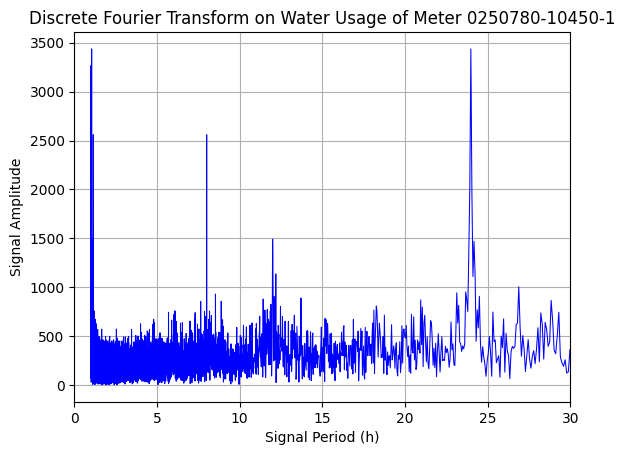

In [8]:
# Plot frequency domain result
plt.title(f'Discrete Fourier Transform on Water Usage of Meter {METERNUM}')
g = seaborn.lineplot(data=df_account,x="FFT_Period",y="FFTA",color='b',size=0.01)
g.set(xlim=(0, 30))#len(df_account['FFT_W'])))
g.set_xlabel(f'Signal Period (h)')
g.set_ylabel(f'Signal Amplitude')
legend = g.legend()
g.grid()
legend.remove()

In [9]:
#I added some corrections starting from here
meter_numbers = df['AccountNumber'].unique()
meter_numbers

array(['0250780-511949', '0751760-445274', '0800240-294760',
       '1000320-20089', '1202220-661732', '2850660-9136',
       '3153360-272144', '3821030-21500', '4300880-171830',
       '4351180-669343', '4354160-667558', '4403520-25706',
       '4951960-220808', '5751740-68085'], dtype=object)

In [10]:
#Number of data points for each unique account number
[len(df[df['AccountNumber']==number]) for number in df['AccountNumber'].unique()]  #we want to take the minimum of these (or a preset threshold)


[9112,
 9047,
 9095,
 8760,
 8920,
 9096,
 9143,
 7852,
 9144,
 9095,
 9096,
 9168,
 9192,
 9143]

In [11]:
#truncate each account number to have same length = threshold
LEN_THRES = 300
df_account_list = [df[df['AccountNumber'] == number].tail(LEN_THRES).iloc[:,:4] for number in df['AccountNumber'].unique()]
[len(e) for e in df_account_list]  #display number of data points for each account

[300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300]

In [12]:
#need to run the above block before running this one!!

#list to store pivoted account dataframes
df_account_pivoted_list = []

#conduct fourier transfor on each account
for (idx, df_account) in enumerate(df_account_list):
    df_account['FFT_F'] = fftfreq(len(df_account), 1)
    df_account['FFT_Period'] = 1/df_account['FFT_F']
    df_account['FFT'] = fft(df_account['Value'])
    df_account['FFTA'] = np.abs(df_account['FFT'])

    #remove large periods
    df_account = df_account.where(np.abs(df_account['FFT_Period']) <= 30)
    df_account = df_account.dropna()
    df_account_list[idx] = df_account

    #pivot each account dataframe
    df_account_pivoted = df_account.pivot(index="AccountNumber", columns='FFT_Period', values='FFTA')
    df_account_pivoted_list.append(df_account_pivoted)

df_account_pivoted_list[0]  #this shows 0 na's in dataframe


FFT_Period,-30.000000,-27.272727,-25.000000,-23.076923,-21.428571,-20.000000,-18.750000,-17.647059,-16.666667,-15.789474,...,15.789474,16.666667,17.647059,18.750000,20.000000,21.428571,23.076923,25.000000,27.272727,30.000000
AccountNumber,,,,,,,,,,,,,,,,,,,,,
0250780-511949,63.461082,29.909408,120.146315,192.18317,75.414378,34.989099,26.263606,73.701227,75.157978,66.797505,...,66.797505,75.157978,73.701227,26.263606,34.989099,75.414378,192.18317,120.146315,29.909408,63.461082


In [13]:
#combine all pivoted account dataframes
df_accounts_pivoted = pd.concat(df_account_pivoted_list)
df_accounts_pivoted

FFT_Period,-30.000000,-27.272727,-25.000000,-23.076923,-21.428571,-20.000000,-18.750000,-17.647059,-16.666667,-15.789474,...,15.789474,16.666667,17.647059,18.750000,20.000000,21.428571,23.076923,25.000000,27.272727,30.000000
AccountNumber,,,,,,,,,,,,,,,,,,,,,
0250780-511949,63.461082,29.909408,120.146315,192.183170,75.414378,34.989099,26.263606,73.701227,75.157978,66.797505,...,66.797505,75.157978,73.701227,26.263606,34.989099,75.414378,192.183170,120.146315,29.909408,63.461082
0751760-445274,2.989229,5.699594,7.955531,9.628078,11.896248,12.039975,12.817002,13.743793,9.464508,6.245667,...,6.245667,9.464508,13.743793,12.817002,12.039975,11.896248,9.628078,7.955531,5.699594,2.989229
0800240-294760,79.963925,27.246607,55.852218,127.160226,130.652904,99.466947,63.310052,39.171345,13.718563,33.436471,...,33.436471,13.718563,39.171345,63.310052,99.466947,130.652904,127.160226,55.852218,27.246607,79.963925
1000320-20089,1.334729,52.980400,60.457444,55.271188,49.883103,30.451542,33.977515,31.978473,10.116719,53.713384,...,53.713384,10.116719,31.978473,33.977515,30.451542,49.883103,55.271188,60.457444,52.980400,1.334729
1202220-661732,14.399205,120.400719,286.232088,277.105402,156.402886,87.586759,32.828913,40.035047,52.769874,244.655149,...,244.655149,52.769874,40.035047,32.828913,87.586759,156.402886,277.105402,286.232088,120.400719,14.399205
2850660-9136,232.926707,262.622080,456.957995,417.818442,163.340814,216.413783,228.687977,398.031668,186.704370,211.738523,...,211.738523,186.704370,398.031668,228.687977,216.413783,163.340814,417.818442,456.957995,262.622080,232.926707
3153360-272144,45.057327,52.383522,70.562547,33.272500,46.004077,45.380746,8.614412,3.233481,21.088549,23.452282,...,23.452282,21.088549,3.233481,8.614412,45.380746,46.004077,33.272500,70.562547,52.383522,45.057327
3821030-21500,99.306504,248.874186,454.085900,483.540034,219.334182,78.096437,187.359088,146.994296,556.415122,275.764002,...,275.764002,556.415122,146.994296,187.359088,78.096437,219.334182,483.540034,454.085900,248.874186,99.306504
4300880-171830,237.000251,106.928670,540.873035,548.672072,123.462112,260.730787,80.503089,131.281134,25.971766,13.042013,...,13.042013,25.971766,131.281134,80.503089,260.730787,123.462112,548.672072,540.873035,106.928670,237.000251


In [14]:
#save pivoted and combined dataframe
df_accounts_pivoted.to_csv("../../data/Processed_Data/leakage_fourier_transform_results.csv")

In [15]:
#Normalize data for PCA

#Replace standard deviation
std_df = df_accounts_pivoted.std(skipna=False)
#for i in range(len(std_df)):
    #if std_df[i] == 0:
        #std_df[i] = 1
std_df

FFT_Period
-30.000000     78.119148
-27.272727     84.549705
-25.000000    244.586901
-23.076923    245.033589
-21.428571     72.137621
                 ...    
 21.428571     72.137621
 23.076923    245.033589
 25.000000    244.586901
 27.272727     84.549705
 30.000000     78.119148
Length: 281, dtype: float64

In [16]:
normalized_df=(df_accounts_pivoted-df_accounts_pivoted.mean())/std_df
normalized_df

FFT_Period,-30.000000,-27.272727,-25.000000,-23.076923,-21.428571,-20.000000,-18.750000,-17.647059,-16.666667,-15.789474,...,15.789474,16.666667,17.647059,18.750000,20.000000,21.428571,23.076923,25.000000,27.272727,30.000000
AccountNumber,,,,,,,,,,,,,,,,,,,,,
0250780-511949,-0.285038,-0.791699,-0.520739,-0.281112,-0.360001,-0.651968,-0.572812,-0.139960,-0.259938,-0.324543,...,-0.324543,-0.259938,-0.139960,-0.572812,-0.651968,-0.360001,-0.281112,-0.520739,-0.791699,-0.285038
0751760-445274,-1.059135,-1.078037,-0.979434,-1.026132,-1.240515,-0.930865,-0.693744,-0.715772,-0.667546,-0.998324,...,-0.998324,-0.667546,-0.715772,-0.693744,-0.930865,-1.240515,-1.026132,-0.979434,-1.078037,-1.059135
0800240-294760,-0.073785,-0.823193,-0.783607,-0.546475,0.405737,0.131620,-0.239633,-0.471574,-0.641151,-0.695763,...,-0.695763,-0.641151,-0.471574,-0.239633,0.131620,0.405737,-0.546475,-0.783607,-0.823193,-0.073785
1000320-20089,-1.080314,-0.518830,-0.764778,-0.839860,-0.713926,-0.707113,-0.503436,-0.540652,-0.663499,-0.470135,...,-0.470135,-0.663499,-0.540652,-0.503436,-0.707113,-0.713926,-0.839860,-0.764778,-0.518830,-1.080314
1202220-661732,-0.913077,0.278575,0.158307,0.065462,0.762693,-0.012758,-0.513766,-0.463279,-0.398849,1.654540,...,1.654540,-0.398849,-0.463279,-0.513766,-0.012758,0.762693,0.065462,0.158307,0.278575,-0.913077
2850660-9136,1.884285,1.960678,0.856325,0.639722,0.858869,1.552855,1.247702,2.974802,0.432173,1.288266,...,1.288266,0.432173,2.974802,1.247702,1.552855,0.858869,0.639722,0.856325,1.960678,1.884285
3153360-272144,-0.520623,-0.525889,-0.723463,-0.929638,-0.767699,-0.525681,-0.731541,-0.816709,-0.595422,-0.806860,...,-0.806860,-0.595422,-0.816709,-0.731541,-0.525681,-0.767699,-0.929638,-0.723463,-0.525889,-0.520623
3821030-21500,0.173818,1.798077,0.844582,0.907937,1.635071,-0.128092,0.876009,0.563922,2.726113,2.000699,...,2.000699,2.726113,0.563922,0.876009,-0.128092,1.635071,0.907937,0.844582,1.798077,0.173818
4300880-171830,1.936430,0.119236,1.199414,1.173746,0.306055,2.091432,-0.085006,0.413018,-0.565123,-0.922699,...,-0.922699,-0.565123,0.413018,-0.085006,2.091432,0.306055,1.173746,1.199414,0.119236,1.936430


In [17]:
#Compute PCA
cov_df = normalized_df.cov() #is this the covariance matrix?
#covariance matrix summarizes the correlation direction between the variables
evals, evecs = np.linalg.eig(cov_df)
evecs = evecs.transpose()

In [18]:
#Sort eigenvectors by eigenvalues in decreasing order
#By ranking the eigenvectors, you get the principal components in order of significance
sort_evecs = []
for i in range(len(evals)):
    sort_evecs.append(np.append(evals[i],evecs[i]))
sort_evecs = sorted(sort_evecs,key=lambda x : -x[0])
sort_evals = [sort_evecs[i][0] for i in range(len(sort_evecs))]
sort_evecs = [sort_evecs[i][1:] for i in range(len(sort_evecs))]

sort_evals = np.array(sort_evals)
sort_evecs = np.array(sort_evecs)
sort_evecs

array([[ 0.06399779+0.j        ,  0.07058377+0.j        ,
         0.0634144 +0.j        , ...,  0.0634144 +0.j        ,
         0.07058377+0.j        ,  0.06399779+0.j        ],
       [-0.07815519+0.j        ,  0.0252103 +0.j        ,
        -0.01943159+0.j        , ..., -0.01943159+0.j        ,
         0.0252103 +0.j        , -0.07815519+0.j        ],
       [-0.01169877+0.j        ,  0.02572871+0.j        ,
        -0.06512307+0.j        , ..., -0.06512307+0.j        ,
         0.02572871+0.j        , -0.01169877+0.j        ],
       ...,
       [ 0.00609647+0.00352619j,  0.01156966-0.02138804j,
        -0.07075989+0.04578237j, ..., -0.07070445+0.04577406j,
         0.01107852-0.02131444j,  0.01066721+0.00478603j],
       [-0.04621149+0.j        , -0.02863043+0.j        ,
         0.08562262+0.j        , ...,  0.08526664+0.j        ,
        -0.025477  +0.j        , -0.04985214+0.j        ],
       [ 0.00347986+0.j        , -0.04130031+0.j        ,
        -0.06506415+0.j       

<AxesSubplot:title={'center':'Importance Scores of Component Axes from PCA'}, xlabel='Component (Eigenvector)', ylabel='Importance Score (Eigenvalue)'>

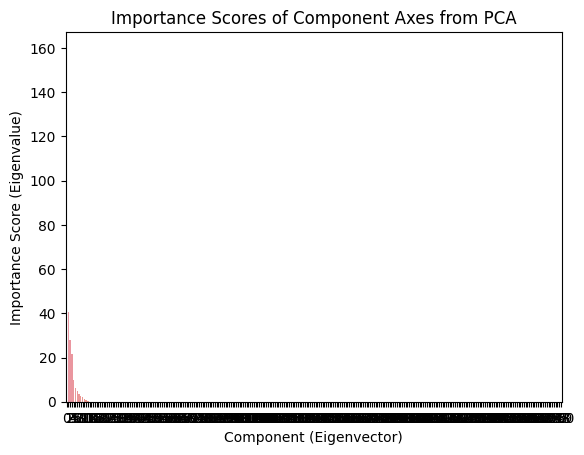

In [19]:
#Plot importance of e-vecs
#Shows that the first few components encompass the most amount of variation/information
plt.title("Importance Scores of Component Axes from PCA")
graph_evals = pd.DataFrame([[i,sort_evals[i]] for i in range(len(sort_evals))],columns=["Component (Eigenvector)","Importance Score (Eigenvalue)"])
seaborn.barplot(data=graph_evals,x="Component (Eigenvector)",y="Importance Score (Eigenvalue)")

<AxesSubplot:title={'center':'Meters on Axes of Components 0 and 1'}, xlabel='Component 0 Axis', ylabel='Component 1 Axis'>

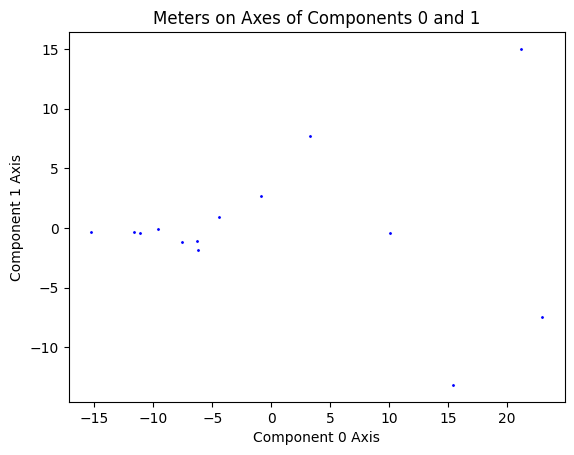

In [20]:
#Project data points onto eigenvectors
pc_array = np.array([np.dot(normalized_df, sort_evecs[i]) for i in range(len(sort_evecs))])

#Transpose so columns correspond to eigenvector directions
pc_array = pc_array.transpose()

#Graph main eigenvectors 0 and 1
plt.title("Meters on Axes of Components 0 and 1")
plt.xlabel("Component 0 Axis")
plt.ylabel('Component 1 Axis')
graph_df = pd.DataFrame(data=pc_array)
seaborn.scatterplot(data=graph_df,x=0,y=1,s=5,color='b')
# seaborn.scatterplot(data=cleaned_df,x='Age',y='DailyRate')

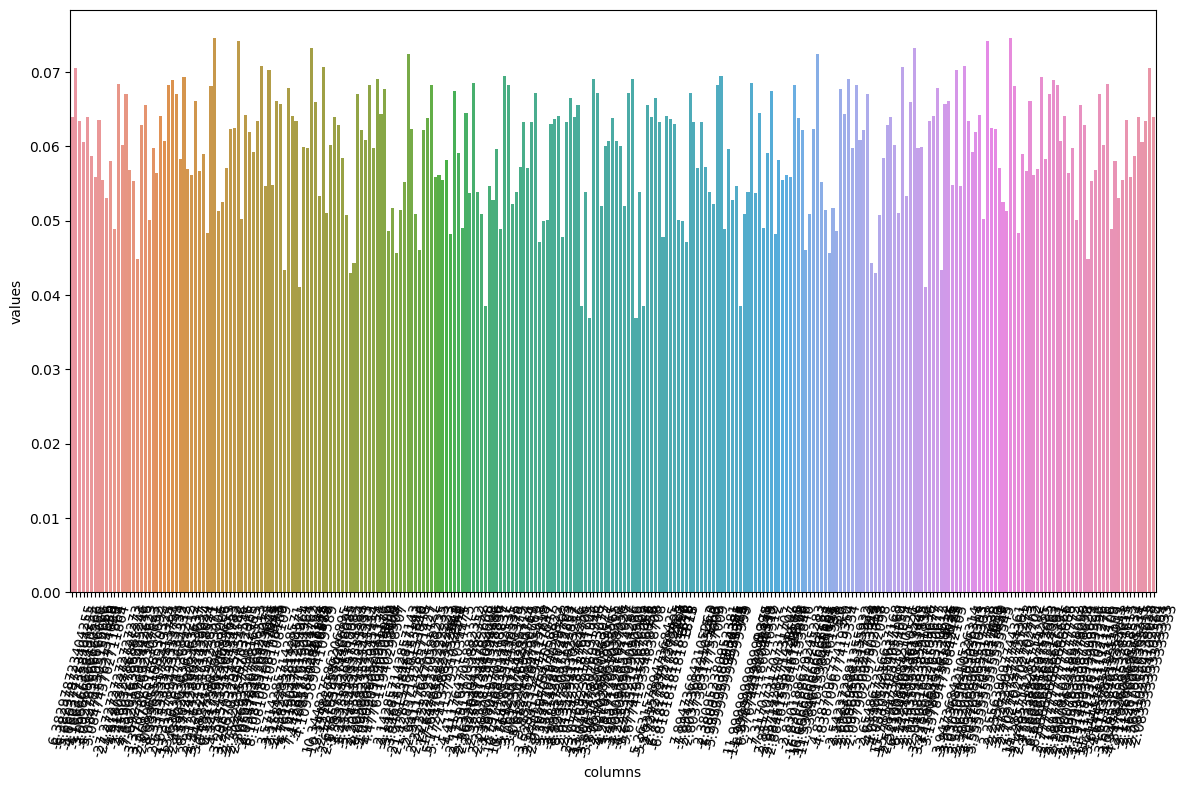

In [21]:
#Weights on variables in component 0
N=0
component_df = pd.DataFrame(np.array([normalized_df.columns, np.abs(sort_evecs[N])]).transpose(),columns=["columns","values"])
sort_component_df = component_df.sort_values(by="values",ascending=False)[:]

#Plot
plt.figure(figsize=(12,8))
plot = seaborn.barplot(data=sort_component_df,x="columns",y="values")
plot.set_xticklabels(sort_component_df["columns"], rotation=75)
plt.tight_layout()
plt.show()

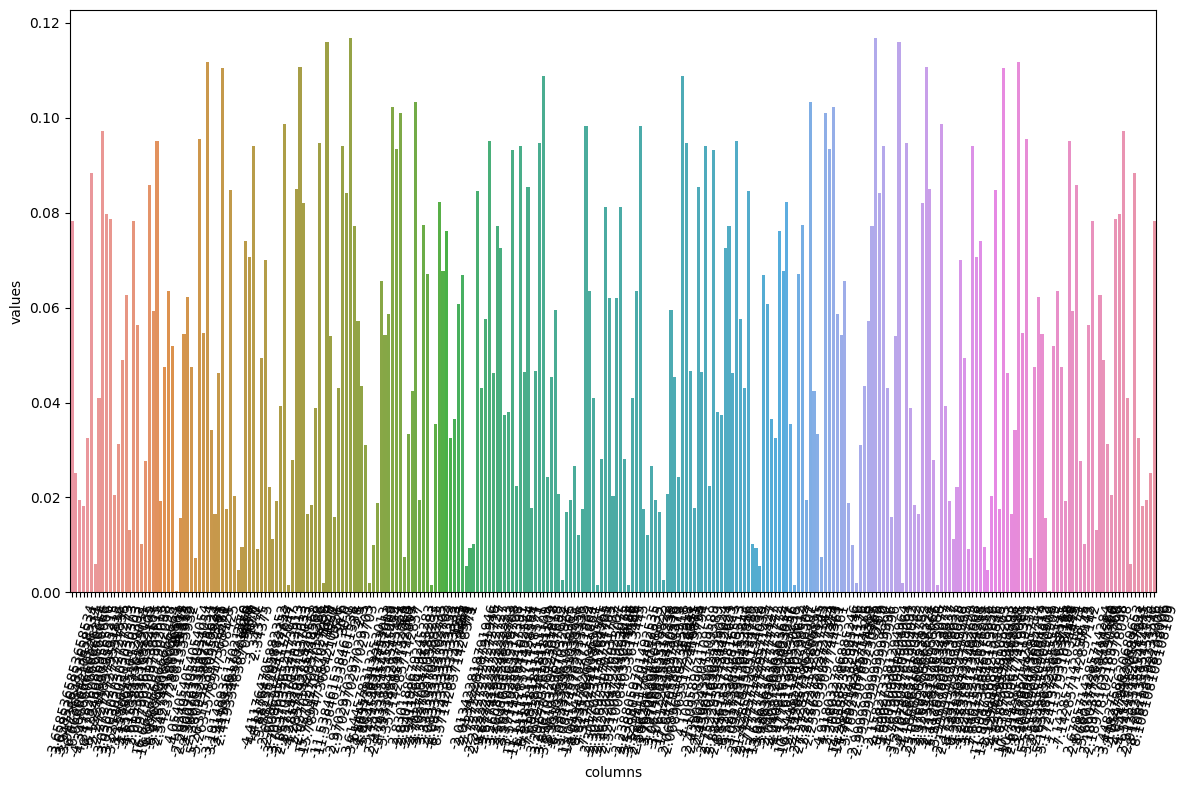

In [22]:
#Weights on variables in component 1
N=1
component_df = pd.DataFrame(np.array([normalized_df.columns, np.abs(sort_evecs[N])]).transpose(),columns=["columns","values"])
sort_component_df = component_df.sort_values(by="values",ascending=False)[:]

#Plot
plt.figure(figsize=(12,8))
plot = seaborn.barplot(data=sort_component_df,x="columns",y="values")
plot.set_xticklabels(sort_component_df["columns"], rotation=75)
plt.tight_layout()
plt.show()

In [35]:
feature_vector = sort_evecs[0:20]
normalized_df.shape, feature_vector.transpose().shape

((14, 281), (281, 20))

In [37]:
final_data = normalized_df.__matmul__(feature_vector.transpose())
final_data

#idk if this is right. Need to relable the column names too I think

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
AccountNumber,,,,,,,,,,,,,,,,,,,,
0250780-511949,-7.531870+0.000000j,-1.136268+0.000000j,1.912322+0.000000j,0.600241+0.000000j,-0.267525+0.000000j,0.519993+0.000000j,1.382074+0.000000j,-1.614583+0.000000j,4.164022+0.000000j,-2.583306+0.000000j,0.466975+0.000000j,-0.112450+0.000000j,0.145512+0.000000j,3.750472e-15+0.000000e+00j,1.998401e-15+0.000000e+00j,-1.221245e-15+1.956768e-15j,-1.221245e-15-1.956768e-15j,-2.525757e-15-1.471046e-15j,-2.525757e-15+1.471046e-15j,1.193490e-15+0.000000e+00j
0751760-445274,-15.288067+0.000000j,-0.331448+0.000000j,0.932686+0.000000j,0.207125+0.000000j,-1.653552+0.000000j,0.346375+0.000000j,0.821719+0.000000j,1.007014+0.000000j,-0.301622+0.000000j,0.996453+0.000000j,-0.815850+0.000000j,0.547314+0.000000j,2.149781+0.000000j,-4.524159e-15+0.000000e+00j,-4.607426e-15+0.000000e+00j,2.414735e-15-4.718448e-16j,2.414735e-15+4.718448e-16j,2.661066e-15+1.582068e-15j,2.661066e-15-1.582068e-15j,-1.137979e-15+0.000000e+00j
0800240-294760,-6.177854+0.000000j,-1.801713+0.000000j,0.920349+0.000000j,-0.724255+0.000000j,-0.118421+0.000000j,0.875885+0.000000j,1.898834+0.000000j,0.201896+0.000000j,-3.648090+0.000000j,-2.839949+0.000000j,1.416551+0.000000j,-0.261257+0.000000j,0.002530+0.000000j,-5.079270e-15+0.000000e+00j,-1.415534e-15+0.000000e+00j,2.137179e-15+2.049576e-15j,2.137179e-15-2.049576e-15j,9.575674e-16+6.591949e-16j,9.575674e-16-6.591949e-16j,3.608225e-16+0.000000e+00j
1000320-20089,-9.598464+0.000000j,-0.111307+0.000000j,1.652948+0.000000j,-0.232278+0.000000j,-1.760162+0.000000j,-0.576345+0.000000j,0.188604+0.000000j,-0.535961+0.000000j,0.474081+0.000000j,2.798313+0.000000j,2.974648+0.000000j,-0.061418+0.000000j,-0.371773+0.000000j,2.414735e-15+0.000000e+00j,1.665335e-15+0.000000e+00j,4.996004e-16+4.996004e-16j,4.996004e-16-4.996004e-16j,8.743006e-16-1.582068e-15j,8.743006e-16+1.582068e-15j,-2.498002e-15+0.000000e+00j
1202220-661732,-0.904686+0.000000j,2.680658+0.000000j,-0.950392+0.000000j,0.203315+0.000000j,9.500073+0.000000j,3.075701+0.000000j,-0.425638+0.000000j,-1.567014+0.000000j,-0.260071+0.000000j,0.811163+0.000000j,-0.065052+0.000000j,0.151782+0.000000j,0.105160+0.000000j,5.551115e-17+0.000000e+00j,-4.024558e-16+0.000000e+00j,-8.326673e-16-7.840950e-16j,-8.326673e-16+7.840950e-16j,-4.996004e-16-5.551115e-17j,-4.996004e-16+5.551115e-17j,6.383782e-16+0.000000e+00j
2850660-9136,22.990738+0.000000j,-7.486455+0.000000j,13.895555+0.000000j,1.378913+0.000000j,-0.141661+0.000000j,0.609569+0.000000j,-0.888255+0.000000j,0.552888+0.000000j,-0.082723+0.000000j,0.296539+0.000000j,-0.237072+0.000000j,0.006407+0.000000j,0.093161+0.000000j,1.700029e-15+0.000000e+00j,1.665335e-15+0.000000e+00j,-1.165734e-15-4.024558e-16j,-1.165734e-15+4.024558e-16j,-3.053113e-16+2.109424e-15j,-3.053113e-16-2.109424e-15j,1.221245e-15+0.000000e+00j
3153360-272144,-11.681833+0.000000j,-0.363781+0.000000j,1.241077+0.000000j,-0.265772+0.000000j,-1.393116+0.000000j,1.000945+0.000000j,1.039755+0.000000j,0.722888+0.000000j,-0.181609+0.000000j,0.195668+0.000000j,-1.210907+0.000000j,2.162068+0.000000j,-1.324015+0.000000j,-4.024558e-15+0.000000e+00j,-3.275158e-15+0.000000e+00j,-2.289835e-15+1.665335e-16j,-2.289835e-15-1.665335e-16j,-8.465451e-16-4.440892e-16j,-8.465451e-16+4.440892e-16j,-3.330669e-16+0.000000e+00j
3821030-21500,21.202420+0.000000j,15.006840+0.000000j,-1.961997+0.000000j,-3.500211+0.000000j,-1.027051+0.000000j,0.807919+0.000000j,2.432705+0.000000j,2.166152+0.000000j,0.585123+0.000000j,0.065069+0.000000j,0.198976+0.000000j,-0.033011+0.000000j,0.060695+0.000000j,-5.551115e-16+0.000000e+00j,-1.838807e-16+0.000000e+00j,0.000000e+00+3.330669e-16j,0.000000e+00-3.330669e-16j,-9.159340e-16+5.551115e-16j,-9.159340e-16-5.551115e-16j,1.498801e-15+0.000000e+00j
4300880-171830,15.411645+0.000000j,-13.136926+0.000000j,-9.859640+0.000000j,-6.900250+0.000000j,-0.407365+0.000000j,-0.621253+0.000000j,1.092537+0.000000j,-0.733650+0.000000j,0.181156+0.000000j,0.446592+0.000000j,-0.168535+0.00

In [25]:
from sklearn.decomposition import PCA
#this is the PCA I tried doing using sklearn, which looks really different

In [26]:
pca_model = PCA(n_components=2)
principalComponents = pca_model.fit_transform(normalized_df)

In [27]:
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_df


,principal component 1,principal component 2
0,-7.531870,-1.136268
1,-15.288067,-0.331448
2,-6.177854,-1.801713
3,-9.598464,-0.111307
4,-0.904686,2.680658
5,22.990738,-7.486455
6,-11.681833,-0.363781
7,21.202420,15.006840
8,15.411645,-13.136926
9,-6.262185,-1.114910
